# Example 3. Support vector machine (SVM)
---

SVM is the extension of the perceptron algorithm which the decision boundary (objective function) is also made by hyperplane, i.e. $w^TX=0$ ($w_0$ is included and $x_0=1$). The major feature of SVM is added the certain margin within the decision boundary. The size of margin is decieded by two extra hyperplanes with 

$$ 
\begin{equation}
\begin{split}
w^TX_{pos}\ge c\ &if\ y=1\\
w^TX_{neg}\le-c\ &if\ y=-1 \ ,
\end{split}
\end{equation}
$$ 

where $c$ is the offset non-zero constant from decision boundary, and they are called **positive hyperplane** and **negative hyperplane**, respeactively. Since they are supposed to be parallel to decision boundary, their $w$ are the same as it. Both hyperplanes are obtained by the training data points on those planes, so called **support vectors**. For separating the categories, we look for the maximum of the margin size $d$ between both hyperplanes. In order to get $d$, we have to know the vertical ditance of any point in space $X$ to any point on hyperplane $X'$, which is 

$$
\begin{equation}
d = \hat{w}\cdot(X-X') = \frac{w}{||w||}\cdot(X-X') = \frac{w^T(X-X')}{||w||}\ ,
\end{equation}
$$

where $\hat{w}$ is unit normal-vector of hyperplane, $||w||$ is the nomalization of $w$ with $\sqrt{\sum^m_jw^2_j}$. The vertical distance is the projection of the vector $X-X'$ to the unit normal-vector of hyperplane. Thus, the vertical distance between both hyperplanes, i.e. the decision boundary margin, can be obtained as 

$$
\begin{equation}
d = \frac{w^T(X_{pos}-X_{neg})}{||w||}\ ,
\end{equation}
$$

where $X_{pos}$ and $X_{neg}$ are the any point on positive and negetive hyperplane, respectively. However, according to the correlation from first fomulars, we can derivate 

$$
\begin{equation}
w^T(X_{pos}-X_{neg})\ge 2c\ .
\end{equation}
$$

By replacing this correlation to $d$, we can also obtain

$$
\begin{equation}
d\ge\frac{2c}{||w||}\ .
\end{equation}
$$

The maximum of $d$ is the optimal solution in the training by looking for idea support verctors in both hyperplanes. In technical concern, the non-zero constant $c$ is included in $w$, i.e. $c=1$ and training for optimizing $w$ only as

$$
\begin{equation}
d_{max}=\frac{2}{||w||}\ .
\end{equation}
$$

However, in order to optimizing easier, we inverse it and square the $||w||$ for searching the minimum value $l$ as

$$
\begin{equation}
l_{min}=\frac{1}{2}||w||^2=\frac{1}{2}w^Tw\ .
\end{equation}
$$

Since $||w||=\sqrt{\sum_{j}^{m}w_j^2}$, the formular is the same as L2 ragularization term, i.e. SVM is a ***smooth*** type of perceptron algorithm. In summery, the conditions of SVM has to follow below correlations.

$$
\begin{equation}
l_{min}=\frac{1}{2}w^Tw\ .
\end{equation}
$$

$$
\begin{equation}
\begin{split}
y^s(w^TX^s_{pos,\ neg})&=1\ ,\\
y^i(w^TX^i_{pos,\ neg})&>1\ ,
\end{split}
\end{equation}
$$

where $s$ is the data on the one of two hyperplanes as support verctor, $i$ is the data in the oulier of margin and can be classified.

## Import data

In [1]:
from sklearn import datasets
import numpy as np

from plot_decision_regions import plot_decision_regions
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
np.unique(y)

array([0, 1, 2])

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0 )
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## 1. Linear SVM with Sklearn

In [5]:
from sklearn.svm import SVC

In [6]:
svm = SVC(kernel='linear', C=1., random_state=0)
svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

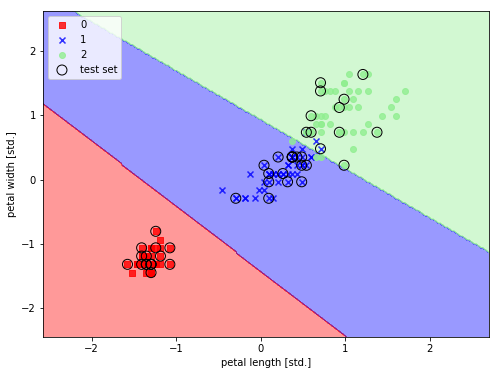

In [7]:
plt.figure(figsize=(8, 6))

X_combined_std = np.vstack( (X_train_std, X_test_std) )
y_combined = np.hstack( (y_train, y_test) )
plot_decision_regions( X=X_combined_std, y=y_combined, classifier=svm, test_idx=range(105,150) )
plt.xlabel('petal length [std.]')
plt.ylabel('petal width [std.]')
plt.legend(loc='upper left')
plt.show()

### 1.1 Turning penalty test

By turing the C parameter for allowing some training data into the margin, i.e. make the decision margin is get sort or strict. Thus, C is also called pnealty parameter as like the regularization method.

In [8]:
C_min = 0.05
C_max = 2.05
N_C = 10
svm_C = []
for i in range(N_C):
    C = (C_max - C_min )/N_C*i + C_min
    svm_C.append(SVC(kernel='linear', C=C, random_state=0))
    svm_C[i].fit(X_train_std, y_train)

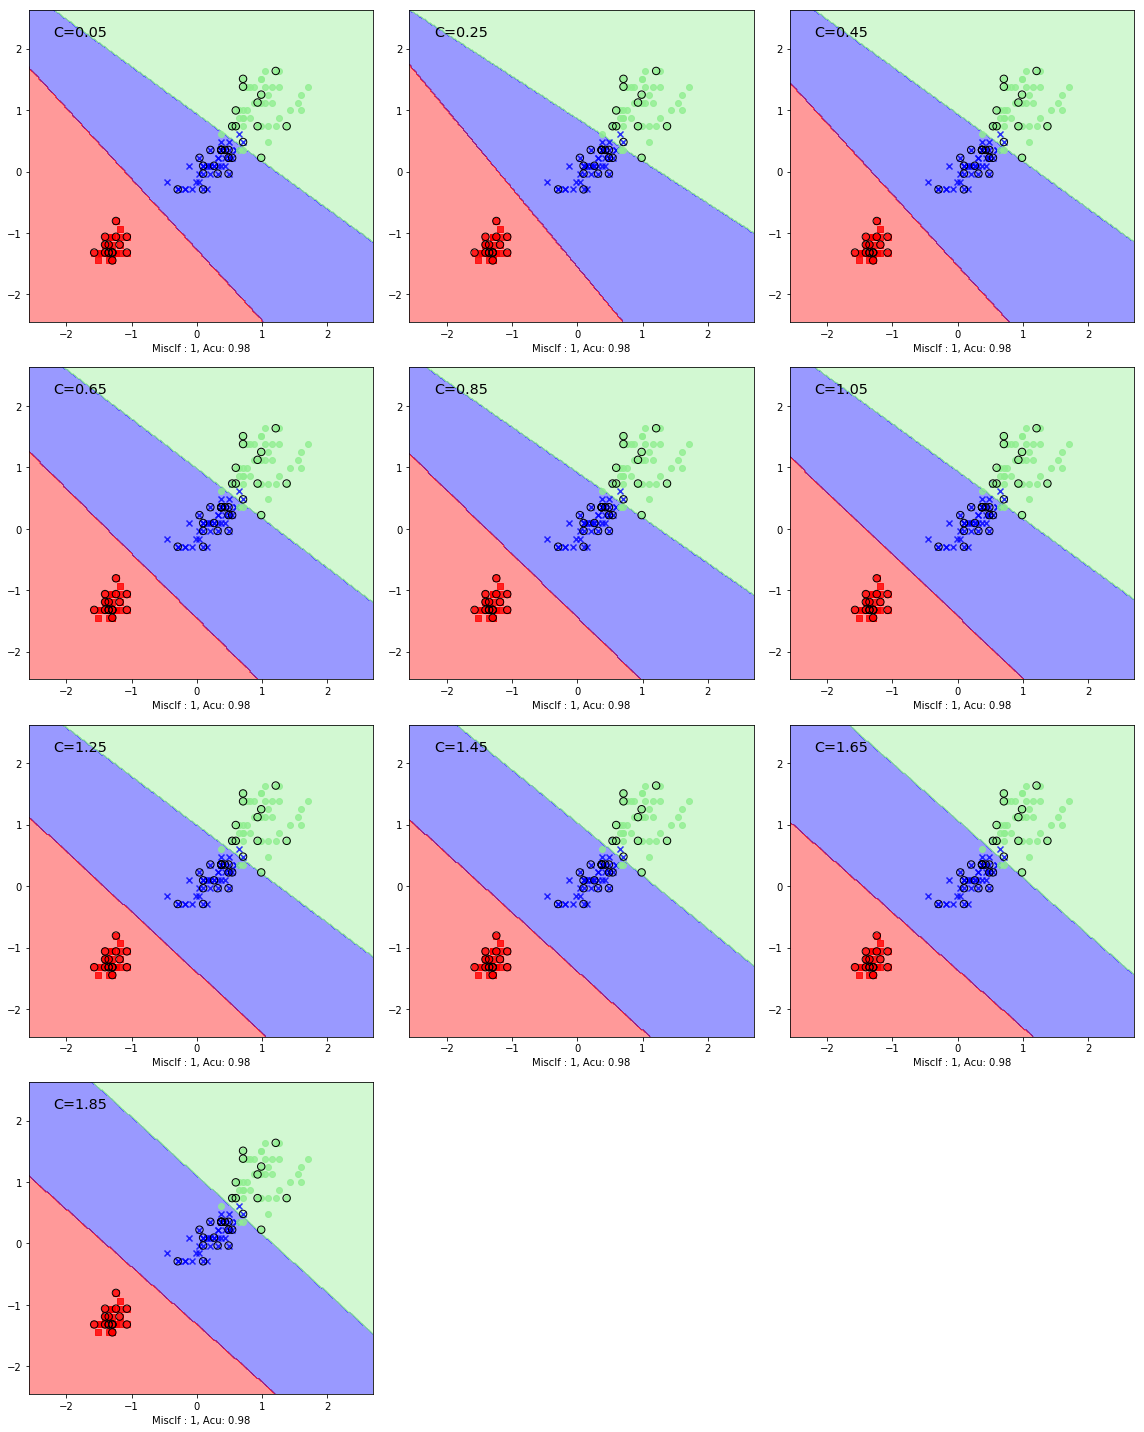

In [9]:
r = int(N_C/3)
fig = plt.figure(figsize=(16, N_C*2))
for i in range(N_C):
    C = (C_max - C_min )/N_C*i + C_min
    fig.add_subplot( r if N_C%3 is 0 else r+1, 3, i+1 )
    plot_decision_regions( X=X_combined_std, y=y_combined, classifier=svm_C[i], test_idx=range(105,150), highlightSize=55 )
    plt.text(-2.2, 2.2, 'C='+str(C), fontsize='x-large')
    y_pred_ = svm_C[i].predict(X_test_std)
    plt.xlabel('Misclf : %d, Acu: %.2f'%( (y_test != y_pred_).sum(), svm_C[i].score(X_test_std, y_test) ) )
plt.tight_layout()
plt.show()

## 2. Kernel SVM with Sklearn

The kernel SVM is the non-linear SVM algorithm by transfering the features to higher dimention space. Different from the linear transfer (projection/extraperation), the method use the dual correlation to expand the feature $x$ to high non-linear demention $\phi(x)$. The transfomation uses **kenel function** $k$ which is defined as

$$
\begin{equation}
k(x^{(i)},x^{(j)})=\phi(x^{(i)})^T\phi(x^{(j)})\ ,
\end{equation}
$$ 

Where $\phi(.)$ is the transfer function to project data to much higher dimensions space. The innder product of the projected data can have a scalar value of $k$, which is the feature of kernel function. In the other point of view, the correlation represent the **similarity** between two datapoint in new hyperspace. Since $k$ is a scalar, if we can find a transfer function has such correlation, the transfered dimensions may can be ignored and make the new dimension to even infinite, i.e. a learning algorithm with such property can perform the non-linear fit without suffering the high computing cost of feature dimensions. Although it independents from projected feature dimensions, the number of data is correlated to the size of matrix of kernel functiom, see the detail in [(Kernel PCA, Chapter 5.)](../chapter_05/example_03_KernelPCA.ipynb), i.e. it only works well for small dataset. Here we shows a common kernel fucntion, the **Radial Basis Fuction** (RBF) kenel, in SVM algorithm. It can probide much smooth and good perfomance in fit than standard SVM. The RBF kernel function is defined 

$$
\begin{equation}
\begin{split}
k(x^{(i)},x^{(j)})&=\exp\left[-\frac{||x^{(i)}-x^{(j)}||^2}{2\sigma^2}\right] \\
&=\exp\left[-\gamma||x^{(i)}-x^{(j)}||^2\right]\ ,
\end{split}
\end{equation}
$$

where $\gamma$ is a free parameter simplified from $\frac{1}{2\sigma^2}$. It can be split to two transformation function as

$$
\begin{equation}
\begin{split}
e^{-||x^{(i)}-x^{(j)}||^2}&=e^{(-x^{(i)})^2}e^{(-x^{(j)})^2}e^{2x^{(i)}x^{(j)}}\\
&=e^{(-x^{(i)})^2}e^{(-x^{(j)})^2}\sum_{k=0}^\infty\frac{(2x^{(i)}x^{(j)})^k}{k!}\\
&=\sum_{k=0}^\infty\left(x^{(i)}e^{(-x^{(i)})^2}\sqrt{\frac{2^k}{k!}}\right)\left(x^{(j)}e^{(-x^{(j)})^2}\sqrt{\frac{2^k}{k!}}\right)\\ 
&=\psi(x^{(i)})^T\psi(x^{(j)})\mid_{\infty\times\infty}\ .
\end{split}
\end{equation}
$$

In the derivation in above, we have use Tylor series expansion to expand the terms to infinit. 
However, the RBF kernel function is actually a **Gussian function** with mean value $x^{(j)}$ and diviation $\sigma$, i.e. the ideal of this function is looking for support vectors within the radius $\sigma$. Thus, if $\sigma$ $(\gamma)$ is small (large), the algorithm is much strict and sometimes makes overfit performance. That is the reason it also called **radial basis**.
Here is the performance demonstration of RBF SVM with different $\gamma$ parameter:

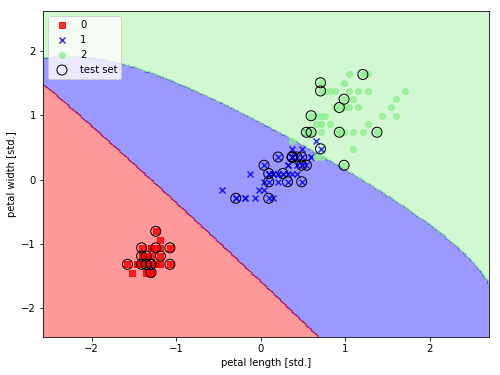

In [10]:
svm = SVC(kernel='rbf', C=1., gamma=.2, random_state=0)
svm.fit(X_train_std, y_train)

plt.figure(figsize=(8, 6))
plot_decision_regions( X=X_combined_std, y=y_combined, classifier=svm, test_idx=range(105,150) )
plt.xlabel('petal length [std.]')
plt.ylabel('petal width [std.]')
plt.legend(loc='upper left')
plt.show()

### 2.1 Turning $\gamma$ test

In [16]:
g_min = 0.1
g_max = 100.1
N_g = 10
svm_g = []
for i in range(N_g):
    g = (g_max - g_min )/N_g*i + g_min
    svm_g.append(SVC(kernel='rbf',  C=1., gamma=g, random_state=0))
    svm_g[i].fit(X_train_std, y_train)

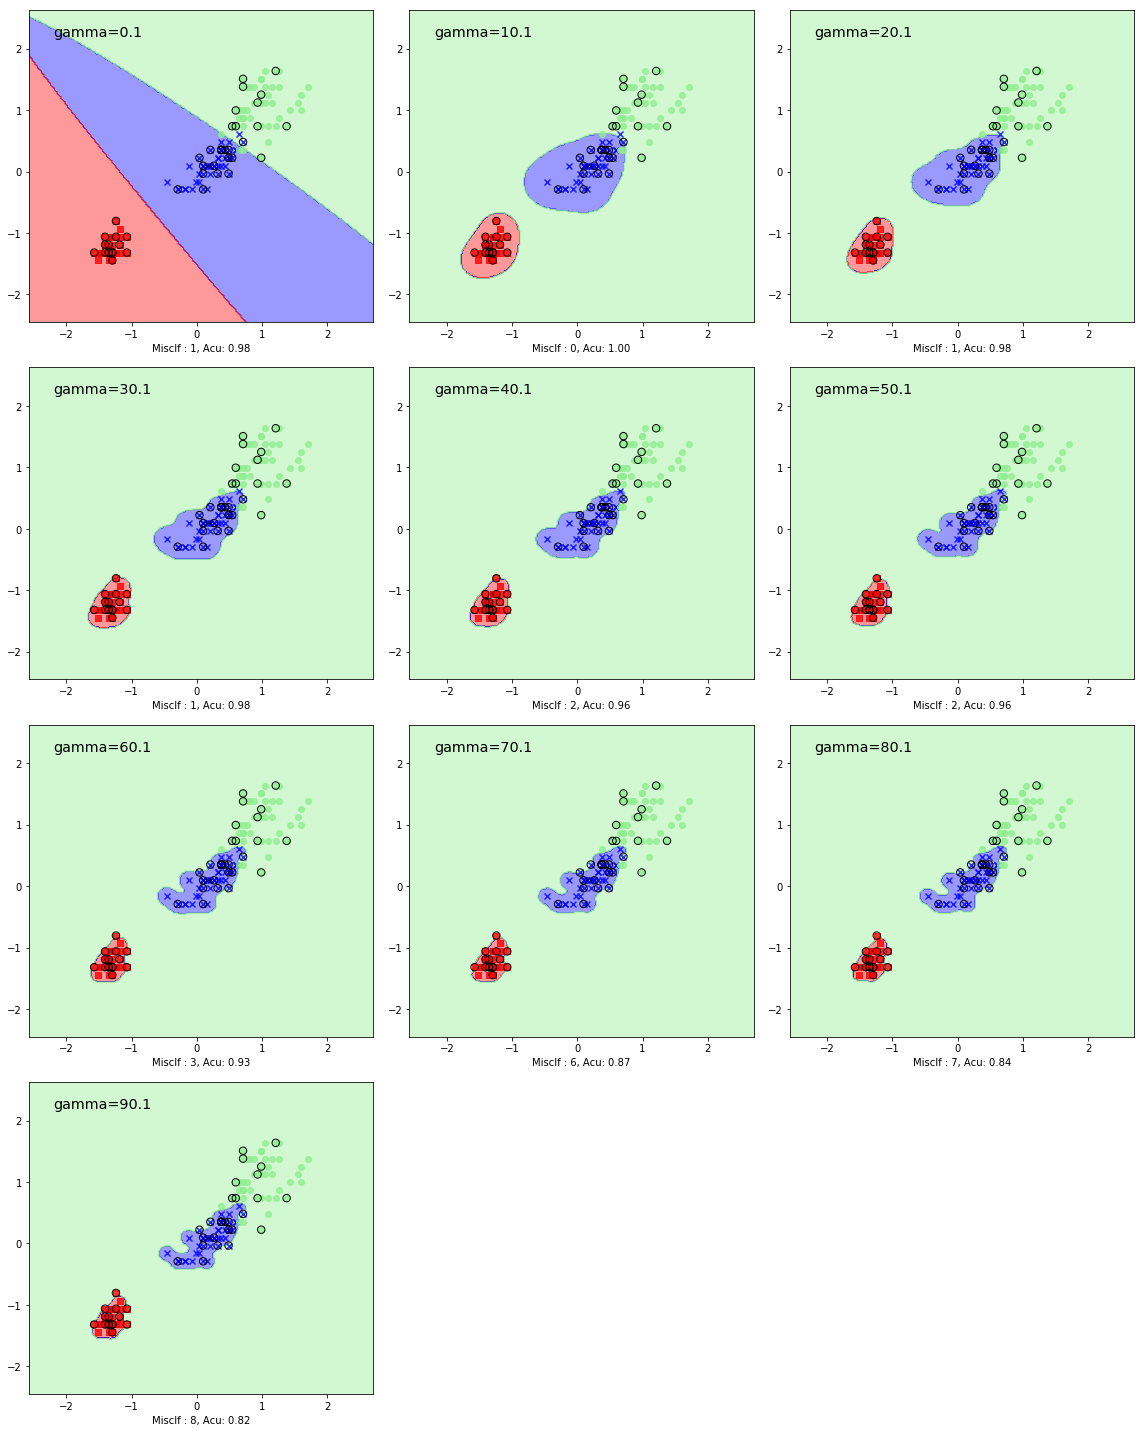

In [17]:
r = int(N_g/3)
fig = plt.figure(figsize=(16, N_g*2))
for i in range(N_g):
    g = (g_max - g_min )/N_g*i + g_min
    fig.add_subplot( r if N_g%3 is 0 else r+1, 3, i+1 )
    plot_decision_regions( X=X_combined_std, y=y_combined, classifier=svm_g[i], test_idx=range(105,150), highlightSize=55 )
    plt.text(-2.2, 2.2, 'gamma='+str(g), fontsize='x-large')
    y_pred_ = svm_g[i].predict(X_test_std)
    plt.xlabel('Misclf : %d, Acu: %.2f'%( (y_test != y_pred_).sum(), svm_g[i].score(X_test_std, y_test) ) )
plt.tight_layout()
plt.show()